<a href="https://colab.research.google.com/github/aditya110802/Background-Remover/blob/main/parkinsons_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [ ]:
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [ ]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinsons_data.shape

(195, 24)

In [ ]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinsons_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
parkinsons_data['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
parkinsons_data.groupby('status').mean(numeric_only=True)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
X=parkinsons_data.drop(columns=['name','status'], axis=1)
Y=parkinsons_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [ ]:
model=svm.SVC(kernel='linear')

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [ ]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


In [ ]:
# Replace this with your actual list of feature names used during training
feature_names = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
    'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP',
    'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
    'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
    'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
    'RPDE', 'DFA', 'spread1', 'spread2',
    'D2', 'PPE'
]

input_data = (245.51000,262.09000,231.84800,0.00235,0.000010,0.00127,0.00148,0.00380,0.01608,0.14100,0.00906,0.00977,0.01149,0.02719,0.00476,24.60200,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336)

# Create a DataFrame with proper column names
input_df = pd.DataFrame([input_data], columns=feature_names)

# Standardize and predict
std_data = scaler.transform(input_df)
prediction = model.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print("The person does not have Parkinson's Disease")

else:
  print("The person has Parkinson's Disease")

[0]
The person does not have Parkinson's Disease


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction))

# Classification report
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))

Confusion Matrix:
 [[ 5  3]
 [ 2 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



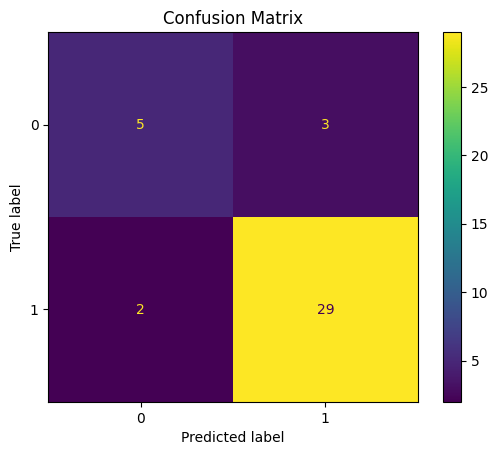

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
print("Random Forest accuracy:", accuracy_score(Y_test, model_rf.predict(X_test)))

Random Forest accuracy: 0.7948717948717948


In [ ]:
# Save model and scaler
joblib.dump(model, 'svm_parkinsons_model.sav')
joblib.dump(scaler, 'parkinsons_scaler.sav')

# Load back later
loaded_model = joblib.load('svm_parkinsons_model.sav')
loaded_scaler = joblib.load('parkinsons_scaler.sav')

In [ ]:
from google.colab import files

files.download('svm_parkinsons_model.sav')
files.download('parkinsons_scaler.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Available features:
 Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


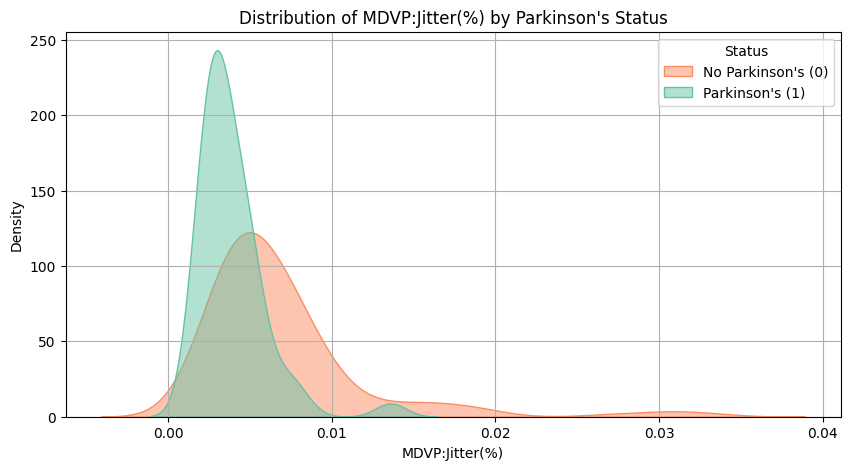

In [ ]:
# View available features (excluding name and status)
available_features = parkinsons_data.columns.drop(['name', 'status'])
print("Available features:\n", available_features)

# Choose a feature to visualize
feature_to_plot = 'MDVP:Jitter(%)'  # You can change this to any other available feature

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(
    data=parkinsons_data,
    x=feature_to_plot,
    hue='status',
    fill=True,
    common_norm=False,
    palette='Set2',
    alpha=0.5
)
plt.title(f"Distribution of {feature_to_plot} by Parkinson's Status")
plt.xlabel(feature_to_plot)
plt.ylabel("Density")
plt.legend(title='Status', labels=["No Parkinson's (0)", "Parkinson's (1)"])
plt.grid(True)
plt.show()

<ipython-input-44-fa772f6e44ee>:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


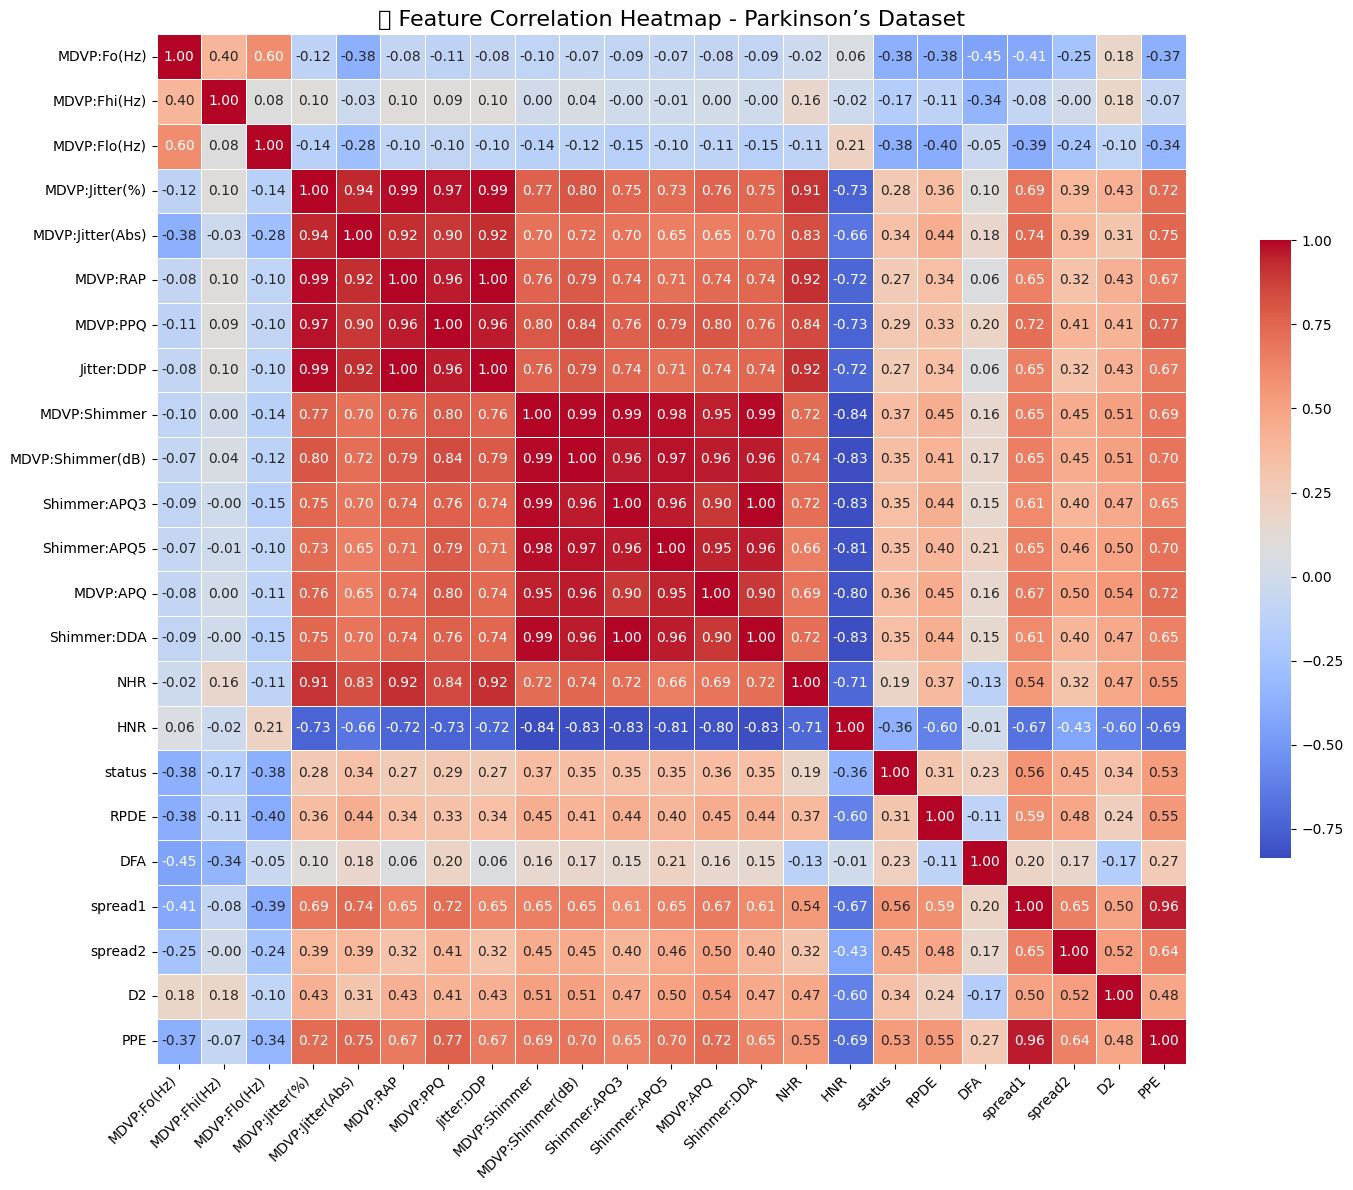

In [ ]:
df_corr = parkinsons_data.drop(columns=['name'])

# Compute the correlation matrix
correlation_matrix = df_corr.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={'shrink': .6},
    linewidths=0.5
)
plt.title("🔍 Feature Correlation Heatmap - Parkinson’s Dataset", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-46-abc82cfe28d0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=parkinsons_data, y=col, x='status', palette='Set2')
<ipython-input-46-abc82cfe28d0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=parkinsons_data, y=col, x='status', palette='Set2')
<ipython-input-46-abc82cfe28d0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=parkinsons_data, y=col, x='status', palette='Set2')
<ipython-input-46-abc82cfe28d0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

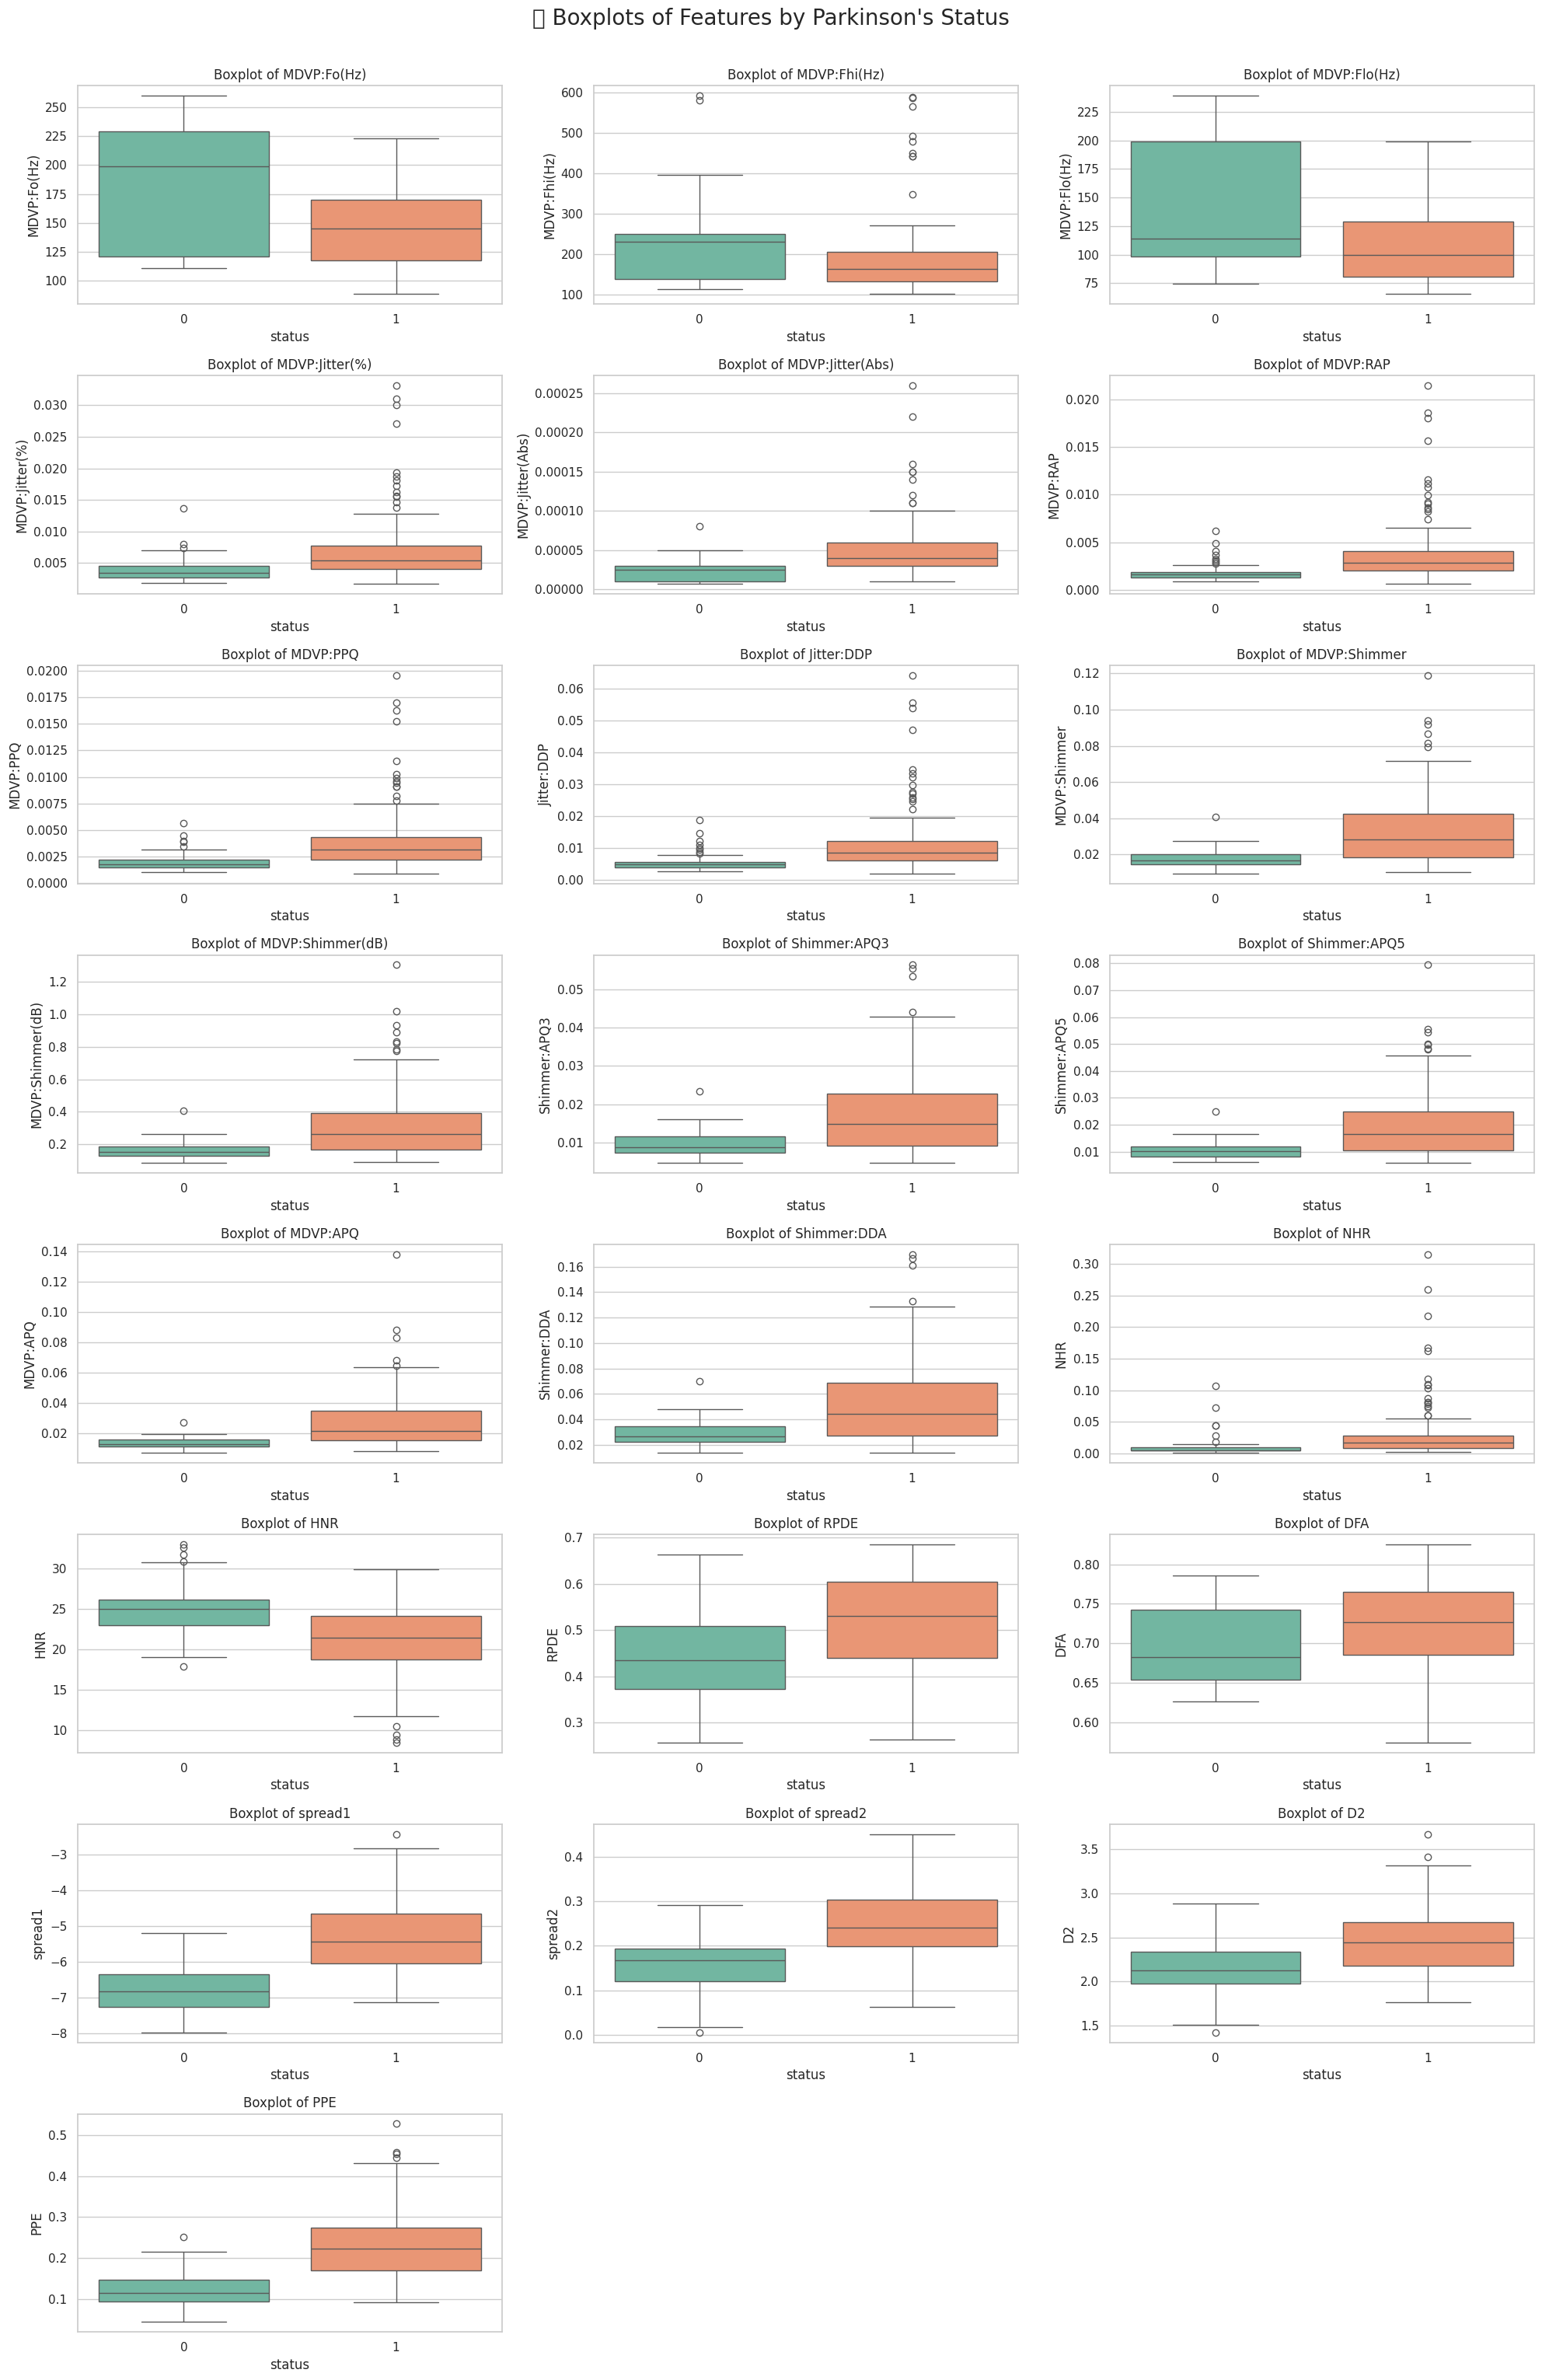

In [ ]:
features = parkinsons_data.drop(columns=['name', 'status'])

# Set plot style
sns.set(style="whitegrid")

# Create a boxplot for each feature
plt.figure(figsize=(20, 30))  # Adjust size as needed

for i, col in enumerate(features.columns, 1):
    plt.subplot(8, 3, i)  # Adjust rows & columns based on number of features
    sns.boxplot(data=parkinsons_data, y=col, x='status', palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("📊 Boxplots of Features by Parkinson's Status", fontsize=20, y=1.02)
plt.show()

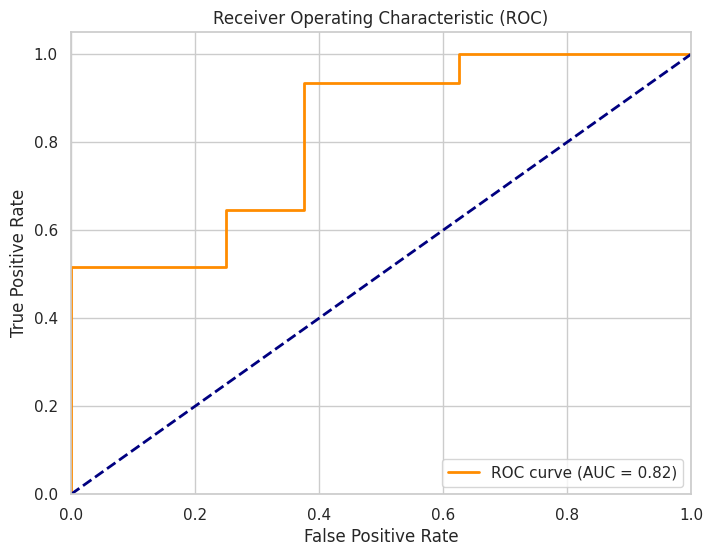

In [ ]:
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = svm.SVC(kernel='linear', probability=True)
model.fit(X_train_scaled, Y_train)

# Predict probabilities
Y_prob = model.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()